In [1]:
from pathlib import Path

import cv2
import numpy as np


In [2]:
# Loading the image
data_dir = Path('data')
img_paths = list((data_dir / 'images').iterdir())



In [3]:
img_paths

[WindowsPath('data/images/book1.jpg'),
 WindowsPath('data/images/book2.jpg'),
 WindowsPath('data/images/darkknight1.jpg'),
 WindowsPath('data/images/darkknight2.jpg'),
 WindowsPath('data/images/eiffel1.jpg'),
 WindowsPath('data/images/eiffel2.jpg'),
 WindowsPath('data/images/ironman1.jpg'),
 WindowsPath('data/images/ironman2.jpg'),
 WindowsPath('data/images/ironman3.jpg'),
 WindowsPath('data/images/liberty1.jpg'),
 WindowsPath('data/images/liberty2.jpg'),
 WindowsPath('data/images/robert1.jpg'),
 WindowsPath('data/images/taj1.jpg'),
 WindowsPath('data/images/taj2.jpg'),
 WindowsPath('data/images/tom1.jpg')]

In [4]:
# Applying SIFT detector
sift = cv2.SIFT_create()
keypoints = []
descriptors = []
for img_path in img_paths:
    img = cv2.imread(str(img_path), 0)

    cur_keypoints, cur_descriptors = sift.detectAndCompute(img, None)

    keypoints.append(cur_keypoints)
    descriptors.append(cur_descriptors)



In [5]:
def bf_match(descriptor1: np.ndarray, descriptor2: np.ndarray) -> list[cv2.DMatch]:
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptor1, descriptor2)
    matches = sorted(matches, key=lambda x: x.distance)
    return matches


In [6]:
img_paths

[WindowsPath('data/images/book1.jpg'),
 WindowsPath('data/images/book2.jpg'),
 WindowsPath('data/images/darkknight1.jpg'),
 WindowsPath('data/images/darkknight2.jpg'),
 WindowsPath('data/images/eiffel1.jpg'),
 WindowsPath('data/images/eiffel2.jpg'),
 WindowsPath('data/images/ironman1.jpg'),
 WindowsPath('data/images/ironman2.jpg'),
 WindowsPath('data/images/ironman3.jpg'),
 WindowsPath('data/images/liberty1.jpg'),
 WindowsPath('data/images/liberty2.jpg'),
 WindowsPath('data/images/robert1.jpg'),
 WindowsPath('data/images/taj1.jpg'),
 WindowsPath('data/images/taj2.jpg'),
 WindowsPath('data/images/tom1.jpg')]

In [7]:
matches = bf_match(descriptors[0], descriptors[1])

In [8]:
from matplotlib import pyplot as plt
first_img_idx = 2
second_img_idx = 3

img1 = cv2.imread(str(img_paths[first_img_idx]), cv2.IMREAD_GRAYSCALE)  # queryImage
img2 = cv2.imread(str(img_paths[second_img_idx]), cv2.IMREAD_GRAYSCALE)  # trainImage
img3 = cv2.drawMatches(img1, keypoints[first_img_idx],
                       img2, keypoints[second_img_idx],
                       matches[:min(50, len(matches))], None,
                       flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


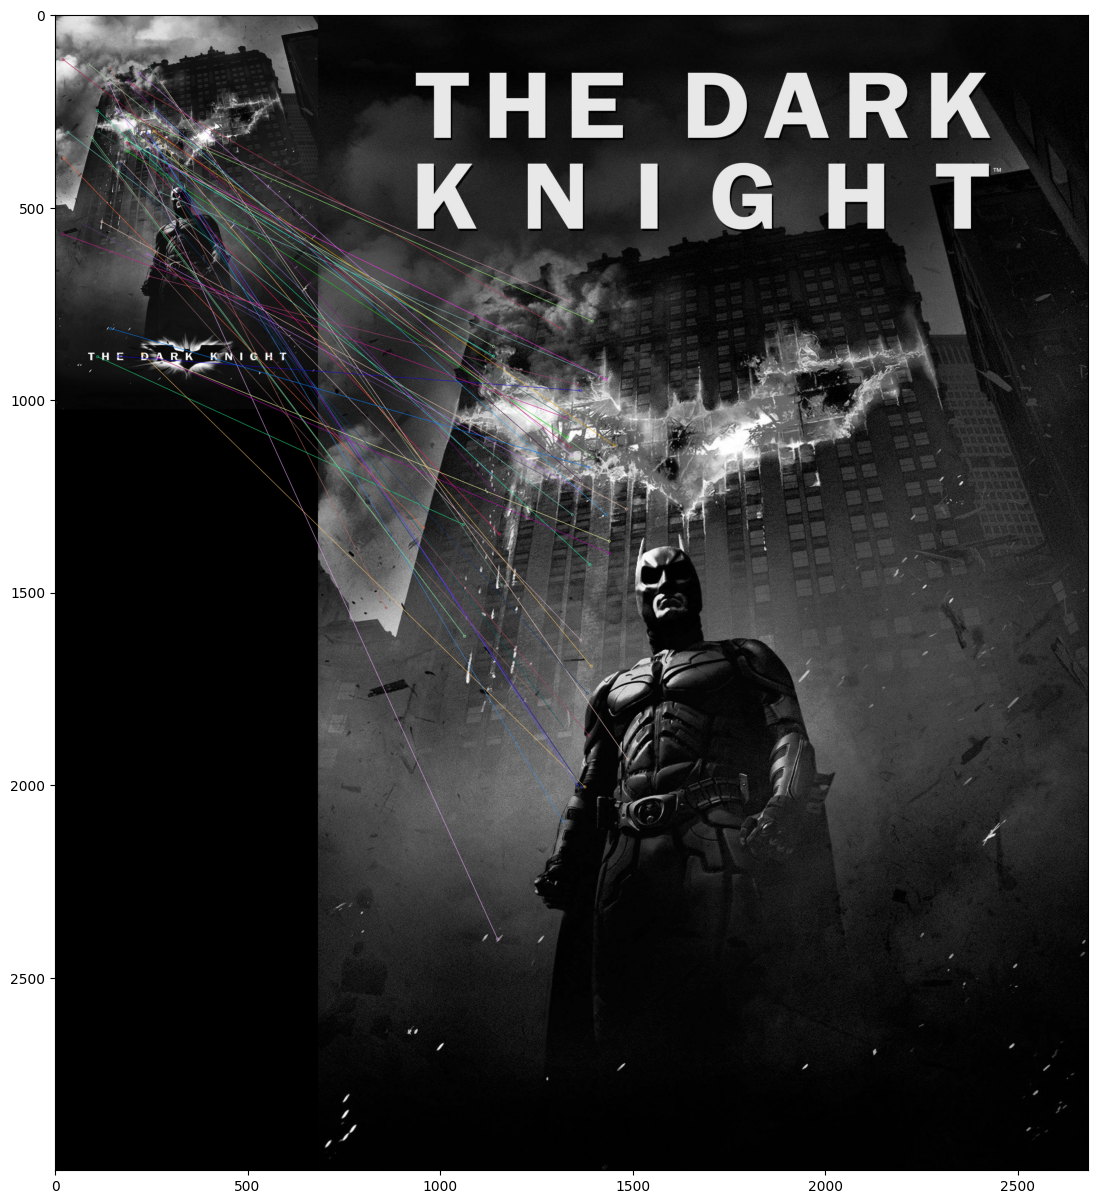

In [9]:
fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(img3)

In [10]:
## https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html